In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1. Solving Linear Equation

In [ ]:
Xs = [
        [
            [12, -1, 2, -3],
            [5, 15, 5, 2],
            [-7, 5, 27, -13],
            [6, -7, 8, -22]
        ],
        [
            [13, 21, 15],
            [-3, -6, 13],
            [12, 17, 9]
        ],
        [
            [13, -5, 3],
            [5, -7, 1],
            [-3, -4, -9]
        ],
        [
            [91, -29, -35, 22],
            [18, -89, 31, -24],
            [-29, 16, -76, 25],
            [-13, -46, -17, 79]
        ],
        [
            [2.18, -1.68, 21.5],
            [-5.71, -23.22, 9.35],
            [-11.21, -3.21, 24.54]
        ],
        [
            [15.2, -5.91, 1.53, -2.67],
            [6.34, 21.14, -8.39, -3.32],
            [-3.41, 12.9, 27.81, -7.32],
            [-8.18, -7.24, -6.35, -24.16]
        ]
]
Ys = [
    [17, -15, -25, 19],
    [27, -15, 33],
    [17, 12, -23],
    [-272, -120, -354, 296],
    [-21.33, 34.21, -25.71],
    [21.76, -27.21, 35.31, -34.76]
]

In [ ]:
def checkDiagonallyDominant(x):
  x = np.array(x)

  diag = np.diag(np.abs(x))
  sumWithDiag = np.sum(np.abs(x), axis = 1)
  sumWithoutDiag = sumWithDiag - diag

  if np.all(diag > sumWithoutDiag):
    print("Diagonally Dominant")
    return True
  else :
    print("Not Diagonally Dominant")
    return False

for i in range(len(Xs)):
  checkDiagonallyDominant(Xs[i])

Diagonally Dominant
Not Diagonally Dominant
Diagonally Dominant
Diagonally Dominant
Not Diagonally Dominant
Diagonally Dominant


In [ ]:
def gaussSeidel(x,y,max,epsilon):
  x = np.array(x)
  y = np.array(y)

  if (not checkDiagonallyDominant(x)):
    return False

  diag = np.diag(x)
  x = -x

  np.fill_diagonal(x,0)

  x_initilize = np.zeros(x.shape[0])

  for i in range(max):
    x_new = np.array(x_initilize)
    for j,row in enumerate(x):
      x_new[j] = (y[j] + np.dot(row,x_new))/diag[j]

    distance = np.sqrt(np.dot(x_new - x_initilize, x_new - x_initilize))

    print(f"Iteration {i+1} : {x_new}")

    if distance < epsilon:
      print()
      print("Converged!")
      return x_new
    x_initilize = x_new
  print()
  print("Not Converged!")
  

In [ ]:
for i,(x,y) in enumerate(zip(Xs,Ys)):
  print(f"Matrix {i+1}")
  gaussSeidel(x,y,10,0.00086)
  print()
  print("============================")
  

Matrix 1
Diagonally Dominant
Iteration 1 : [ 1.41666667 -1.47222222 -0.28600823 -0.11284138]
Iteration 2 : [ 1.31343918 -1.32743146 -0.39391505 -0.22630296]
Iteration 3 : [ 1.31512415 -1.27689597 -0.45746628 -0.26503243]
Iteration 4 : [ 1.32024494 -1.25225523 -0.47934929 -0.27943355]
Iteration 5 : [ 1.32234523 -1.24374084 -0.48731538 -0.28446663]
Iteration 6 : [ 1.32312417 -1.24067404 -0.4901047  -0.28624428]
Iteration 7 : [ 1.32340021 -1.23959927 -0.49108807 -0.28686857]
Iteration 8 : [ 1.3234976  -1.2392207  -0.49143351 -0.28708807]

Converged!

Matrix 2
Not Diagonally Dominant

Matrix 3
Diagonally Dominant
Iteration 1 : [ 1.30769231 -0.78021978  2.46642247]
Iteration 2 : [ 0.43843336 -1.04877296  2.87553242]
Iteration 3 : [ 0.24073369 -1.13154273  2.97821888]
Iteration 4 : [ 0.18520228 -1.15653853  3.00783858]
Iteration 5 : [ 0.1687532  -1.16405649  3.01666293]
Iteration 6 : [ 0.16382529 -1.1663158   3.0193097 ]
Iteration 7 : [ 0.16234553 -1.16699466  3.02010467]
Iteration 8 : [ 0.1

2. Regression and Plotting


In [ ]:
lX = [14, 23,  26,  27,  28,  29,  44,  44,  56,  57,  59, 64,  71,  74,  83,  84,  88, 101, 102, 103, 105, 106, 113, 117, 120, 122, 136, 156, 172, 176, 178, 180, 181, 181, 184, 188, 192, 194, 195, 198]

lY = [1069,  1834,  1885,  4037,  4186,  4821,  5651,  6099,  6468,  6527,  7065,  8028, 8758,  8886,  9825, 10074, 10346, 10350, 10720, 10975, 11488, 11989, 11999, 12593, 13366, 13575, 13744, 15044, 15203, 16512, 16600, 17373, 17617, 18009, 18316, 18515, 18712, 19320, 19493, 19974]


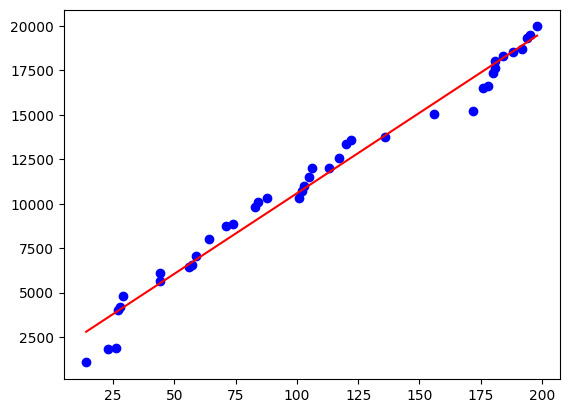

In [ ]:
lX = np.array(lX)
lY = np.array(lY)

A = np.vstack([lX, np.ones(len(lX))]).T
Y = np.vstack(lY)

beta1 = np.dot(A.T,A)
beta2 = np.linalg.inv(beta1)
beta3 = np.dot(beta2,A.T)
beta4 = np.dot(beta3,Y)

m = beta4[0]
c = beta4[1]

y = m * lX + c
plt.plot(lX, lY, 'bo')
plt.plot(lX, y, 'r-')
plt.show()

3. Newton Raphson

In [ ]:
from sympy import *
x = symbols('x')

f1 = 3*x**4-5*x**2+x
df1 = diff(f1,x)
f1 = lambdify(x,f1,'numpy')
df1 = lambdify(x,df1,'numpy')

In [ ]:
def newton_raphson(f,df,max,tolerance,x0):
  if max == 30:
    print("With current iteration, the root is not found")
    return False
  
  if np.abs(f(x0)) < tolerance:
    print(f"Iteration {max} the root calculation is {x0}")
    print(f"In this iteration, we get the root of the equation is : {x0}")
    return

  else:
    if (x0 != 70) :
      print(f"Iteration {max} the root calculation is {x0}")
    return newton_raphson(f,df,max+1,tolerance,x0 - (f(x0)/df(x0)))

In [ ]:
newton_raphson(f1,df1,0,0.086,70)

Iteration 1 the root calculation is 52.50296393872526
Iteration 2 the root calculation is 39.381169501620924
Iteration 3 the root calculation is 29.541129818084812
Iteration 4 the root calculation is 22.16283470903408
Iteration 5 the root calculation is 16.6314145988037
Iteration 6 the root calculation is 12.485898435398976
Iteration 7 the root calculation is 9.38079522307635
Iteration 8 the root calculation is 7.057297996650868
Iteration 9 the root calculation is 5.321712931463143
Iteration 10 the root calculation is 4.029323891851313
Iteration 11 the root calculation is 3.0723691480605257
Iteration 12 the root calculation is 2.3711783661896098
Iteration 13 the root calculation is 1.8678259095445515
Iteration 14 the root calculation is 1.5218411693904814
Iteration 15 the root calculation is 1.3069500397828082
Iteration 16 the root calculation is 1.2037296397191541
Iteration 17 the root calculation is 1.177709965496303
In this iteration, we get the root of the equation is : 1.177709965

4. Integral Riemann 


In [ ]:
fx = lambda x : 12*x**3 + 4*x**2 - 12*x
a = -4
b = 5
n = 40

x = np.linspace(a,b,n)
width = (b-a)/(n-1)

xLeft = x[:-1]
xRight = x[1:]
xMid = (xLeft + xRight)/2

yMid = fx(xMid)

midRiemann = width * (np.sum(np.abs(yMid)))
print("Mid Riemann : ",midRiemann)

yTrapezoid = fx(x)
trapezoid = (np.sum(np.abs(yTrapezoid[1:])) + np.sum(np.abs(yTrapezoid[:-1]))) * width/2
print("Trapezoid : ", trapezoid)

Mid Riemann :  2488.5949546584507
Trapezoid :  2498.018206645426
